$$
% transferring macros:
\let\eps\varepsilon
\let\wt\widetilde
\let\tn\mathrm
\let\vphi\varphi
\let\pa\partial
\let\para\parallel
\let\wh\widehat
\let\sl\shoveleft
\let\lra\leftrightarrow
\let\ov\overline
% defining new macros:
\def\be{\begin{equation} \mskip 1cm}
\def\ee{\end{equation}}
\def\ba{\begin{align} \mskip 1cm}
\def\ea{\end{align}}
\def\RR{{\mathbb R}}
\def\DD{{\mathbb D}}
\def\GG{{\mathbb G}}
\def\CC{{\mathbb C}}
\def\MM{{\mathbb M}}
\def\PP{{\mathbb P}}
\def\JJ{{\mathbb J}}
\def\WW{{\mathbb W}}
\def\HH{{\mathbb H}}
\def\SS{{\mathbb S}}
\def\QQ{{\mathbb Q}}
\def\Bb{{\mathbf B}}
\def\Eb{{\mathbf E}}
\def\Fb{{\mathbf F}}
\def\Ub{{\mathbf U}}
\def\Vb{{\mathbf V}}
\def\Ab{{\mathbf A}}
\def\Jb{{\mathbf J}}
\def\xb{{\mathbf x}}
\def\cb{{\mathbf c}}
\def\eb{{\mathbf e}}
\def\nb{{\mathbf n}}
\def\wb{{\mathbf w}}
\def\ub{{\mathbf u}}
\def\ab{{\mathbf a}}
\def\bb{{\mathbf b}}
\def\rb{{\mathbf r}}
\def\vb{{\mathbf v}}
\def\ib{{\mathbf i}}
\def\jb{{\mathbf j}}
\def\kb{{\mathbf k}}
\def\pb{{\mathbf p}}
\def\qb{{\mathbf q}}
\def\Fb{{\mathbf F}}
\def\Cb{{\mathbf C}}
\def\Yb{{\mathbf Y}}
\def\Mb{{\mathbf M}}
\def\Mcal{\mathcal M}
\def\vs{\mathsf v}
\def\as{\mathsf a}
\def\grad{\tn{grad}}
\def\curl{\tn{curl}}
\def\unit{\mathbb 1}
\def\div{\tn{div}}
\def\Im{\tn{Im}}
\def\vol{\tn{vol}}
\def\dd{\tn{d}}
\def\ii{\tn{i}}
\def\phib{\boldsymbol \phi}
\def\psib{\boldsymbol \psi}
\def\rhob{\boldsymbol \rho}
\def\Lamb{\boldsymbol \Lambda}
\def\ts{\tn s}
\def\tA{\tn A}
\def\tc{\tn c}
\def\ti{\tn i}
\def\te{\tn e}
\def\th{\tn h}
\def\tt{\tn t}
\def\tg{\tn g}
\def\tE{\tn E}
\def\tB{\tn B}
\def\td{\tn d}
\def\tb{\tn b}
\newcommand{\fhD}{f_\tn{h}^\tn{D}}
\newcommand{\whD}{w_\tn{h}^\tn{D}}
\newcommand{\nhD}{n_\tn{h}^\tn{D}}
\newcommand{\jhD}{\jb_\tn{h}^\tn{D}}
% defining new commands:
\newcommand{\abs}[1]{\lvert#1\rvert}
\newcommand{\bold}[1]{{\boldsymbol #1}}
\newcommand{\pder}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\parfra}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dt}[1]{\frac{\mathrm d #1}{\mathrm dt}}
\newcommand{\ds}[1]{\frac{\mathrm d #1}{\mathrm ds}}
\newcommand{\gavg}[1]{\left\langle #1 \right\rangle}
\def\dd{\mathrm{d}}
\def\pab{\bold \pa}
\newcommand{\etab}{\boldsymbol{\eta}}
\newcommand{\gavg}[1]{\langle #1 \rangle}
$$

# Mappings, pull-backs, Hodge and scalar products in STRUPHY

Detailed notes on differential forms can be found in the manuscript "_Structure-preserving integration of ideal MHD Part I: Theory and numerical scheme_", which can be requested by email from <stefan.possanner@ma.tum.de>.

## Table of contents:

Theory:
* [Mappings](#mappings)
* [Notation for vectors and $p$-forms](#notation)
* [Interior product](#interior)
* [Pullbacks of $p$-forms](#pullbacks)
* [Hodge operator](#hodge)
* [Exterior derivative](#exterior)
* [Scalar product](#scalar)
* [Co-differential operator (integration by parts)](#codiff)

STRUPHY routines:
* [Physical functions $\to$ discrete logical functions (pull-back)](#phystolog)
* [Discrete logical functions $\to$ plots in physical space (push-forward)](#logtophys)

## Mappings <a class="anchor" id="mappings"></a>

In this notebook we discuss the use of mappings 

$$
\be  \label{def:F}
F: U\to \Omega\,,\qquad \etab \mapsto F(\etab) =  \xb\,,
\ee
$$

between the logical domain $U$, which is usually the cube $U = [0,1]^3$, and the physical domain $\Omega \subset \RR^3$. The logical coordinates are denoted by $\etab = (\eta_1, \eta_2, \eta_3) \in U$, whereas the physical coordinates are denoted by $\xb=(x,y,z)\in \Omega$. The mapping $F$ is supposed to be $C^1(U,\Omega)$.

In what follows we need the Jacobian matrix $DF$ of $F$, 

$$
\be
 DF : U \to  \RR^{n\times n}\,,\qquad (DF)_{i,j} := \pder{F_i}{\eta_j}\,,
\ee
$$

as well as the _metric tensor_ $G$ induced by $F$ and its determinant,

$$
\be
 G: U \to \RR^{n\times n}\,,\qquad G = (g_{i,j})_{i,j} = (DF)^\top DF\,,\qquad g := \det G\qquad \sqrt{g} = \det DF\,.
\ee
$$

## Notation for vectors and $p$-forms <a class="anchor" id="notation"></a>

Let us fix the notation of vectors and of $p$-forms in 3D. A __vector-field__ $\mathsf a$ is a *contra-variant* object; it is written as

$$
\be \label{vec}
 \mathsf a = \widetilde \ab(\xb) = DF(\etab)\, \bar \ab(\etab) \,, \qquad \mathsf a \lra    \bar \ab = (\bar a^1, \bar a^2, \bar a^3)\,.
\ee
$$

Here, $\widetilde \ab(\xb) \in \RR^3$ are the components of the vector-field in physical space ("as we see/measure it") and $\bar \ab(\etab)\in \RR^3$ denotes the three contra-variant components in logical space, written by convention with an upper index. By definition, the columns of the Jacobian $DF$ are tangent to the coordinates lines of $F$ obtained when only $\eta_j$ is varied and the other $\eta_{i\neq j}$ are held fixed. In case the mapping is also Cartesian, $F(\etab) = (L_x \eta_1, L_y \eta_2, L_z \eta_3)$, we have

$$
\be 
 \mathsf a = \widetilde \ab(\xb) = \begin{pmatrix} 
 L_x & 0 & 0
 \\
 0 & L_y & 0
 \\
 0 & 0 & L_z
 \end{pmatrix}
 \, \bar \ab(\etab)\,, \qquad \mathsf a \lra    \bar \ab = (\bar a^1, \bar a^2, \bar a^3)\,.
\ee
$$

We use the left-right-arrow $\lra$ to identify the abstract vector-field with its components defined by the mapping $F$. For __differentiable $p$-forms__ in 3D we write 

$$
\begin{alignat}{2}
 &\alpha^0 = \tilde a(\xb) = a(\etab) \,, && \alpha^0 \lra a  
\label{a0}
 \\[4mm]
 &\alpha^1 = \widetilde \ab(\xb) = (DF)^{-\top}(\etab)\,\ab(\etab)\,, && \alpha^1 \lra \ab = (a_1, a_2, a_3)\,, 
\label{a1}
 \\[3mm]
 &\alpha^2 = \widetilde{\ab}(\xb) = \frac{1}{\sqrt g (\etab)} DF(\etab)\, \hat \ab(\etab)\,, \qquad && 
\alpha^2 \lra \hat\ab = (a_{23}, a_{31}, a_{12})\,,  \label{a2}
 \\[1mm]
 &\alpha^3 = \widetilde a(\xb) = \frac{1}{\sqrt g(\etab)}\, a_{123}(\etab) && \alpha^3 \lra a_{123} \,.  \label{a3}
\end{alignat}
$$

We use again the left-right-arrow $\lra$ to identify the form with its components defined by the mapping $F$. Note that 1-forms are *co-variant* objects and their components by convention written with a lower index. Components of 2-forms are indexed with 2 indices and 3-forms with three indices. Moreover, the component-vector of a 2-form carries a hat ("pseudo-vector").

Here, $\widetilde \ab(\xb) \in \RR^3$ are again the components of "vector-field" (or "form-field") in physical space ("as we see/measure it"). However, this "vector-field" is now represented in terms of forms, rather than vectors. From the formulas \eqref{vec}, \eqref{a1} and \eqref{a2} we now have three different possibilities of representing the physical "vector-field" $\widetilde \ab(\xb)$:

1. as a true vector-field: $\widetilde \ab = DF\, \bar \ab$.


2. as a 1-form: $\widetilde \ab = (DF)^{-\top}\,\ab$.


3. as a 2-form: $\widetilde \ab = \frac{1}{\sqrt g } DF\, \hat \ab$.

__Each representation has of course different coefficients $\bar \ab$, $\ab$ and $\hat \ab$, respectively. You can choose at the beginning of your program how to represent a given physical vector field.__ The same can be said for functions $a(\xb)$, which can be represented either as 0-forms or as 3-forms.

To change between vector- and 1-form-representation we introduce the __flat operator__ 
$\flat$, also called "index-lowering operator"

$$
\begin{alignat}{2}
 \flat:\ \mathsf a \mapsto 
\flat\,\mathsf a \,,\quad &&\bar \ab \mapsto G \bar \ab = \ab =
(a_i)_i\,,\quad  a_i = \sum_{j=1}^n g_{ij}a^j \,,  \label{def:flat}
\end{alignat}
$$

and its inverse, the __sharp operator__ $\sharp$, or "index-raising operator"

$$
\begin{alignat}{2}
\sharp:\ \alpha^1 \mapsto 
\sharp\,\alpha^1\,,\quad  &&\ab \mapsto G^{-1} \ab = \bar \ab = (a^i)_i\,, \quad a^i = \sum_{j=1}^n g^{ij}a_j 
\,.  \label{def:sharp}
\end{alignat}
$$

The relation between vector and 2-form-representation involves the interior product and is given by formula \eqref{2tovec}. To change between 1-form and 2-form representation we need the Hodge operator (see below).


## Interior product <a class="anchor" id="interior"></a>

The interior product, denoted by $i$, is between a vector and a $p$-form. It returns a ($p$-1)-form and is defined by

$$
\be \label{interiors}
 i_\vs \alpha^0 = 0\,,\qquad i_\vs \alpha^1 \lra \ab^\top \bar \vb\,, \qquad i_\vs \alpha^2 \lra \hat 
\ab \times \bar \vb\,, \qquad i_\vs \alpha^3 \lra a_{123} \bar \vb\,. 
\ee
$$

For $n=3$, the interior product allows one to define 
a one-to-one correspondence between a vector-field $\as$ and a 2-form $\alpha^2$ via

$$
\be \label{2tovec}
 \as \lra \bar \ab\,,\qquad \alpha^2 = i_\as \tn{vol}^3 \lra  o\sqrt{g}\, \bar \ab\,.
\ee
$$

In addition to the flat operator \eqref{def:flat}, this is
another way of relating a vector to a differential form. 


## Pullbacks of $p$-forms <a class="anchor" id="pullbacks"></a>

It is quite natural to start out with $p$-forms defined on the physical domain $\Omega$ and to pull them back to the logical $U$ domain under map $F$ defined in \eqref{def:F}. In the physical domain, there is no difference between vectors, 1-forms and 2-forms, everything is a "physical vector field" $\widetilde \ab(\xb)$ ("as we see/measure it"). Similar for functions (0-forms) and 3-forms. After the pullback the $p$-form is still a $p$-form, but expressed in logical coordinates. The formulas for this read as follows: 

$$
\begin{alignat}{2}
  &0\tn{-forms:}\qquad a(\etab) &&= \widetilde a (F(\etab))\,, \label{pull:0}
 \\[3mm]
  &1\tn{-forms:}\qquad\ab(\etab) &&= (DF)^\top \widetilde \ab(F(\etab))\,,  \label{pull:1}
 \\[2mm]
  &2\tn{-forms:}\qquad \hat\ab(\etab) &&= \sqrt g 
(DF)^{-1} \widetilde{\ab}(F(\etab)) \,,  \label{pull:2}
 \\[2mm]
  &3\tn{-forms:}\qquad a_{123}(\etab) &&= \sqrt g\, \widetilde a(F(\etab)) \,,  \label{pull:3}
\end{alignat}
$$

Recall that the tilde indicates components in Cartesian (physical) coordinates. 



## Hodge operator <a class="anchor" id="hodge"></a>

The Hodge operator transforms a $p$-forms into a ($3-p$)-form with the following components:

$$
\begin{alignat}{3}
 &\alpha^0 \lra a \qquad &\Leftrightarrow\qquad & *\alpha^0 \lra o\sqrt{g}\, a
 \\[5mm]
 & \alpha^1 \lra \ab \qquad &\Leftrightarrow\qquad & *\alpha^1 \lra o\sqrt{g}\, 
G^{-1}\ab
 \\[3mm]
 & \alpha^2 \lra \hat\ab \qquad &\Leftrightarrow\qquad & *\alpha^2 \lra o \frac{1}{\sqrt{g}} G\, 
\hat \ab
 \\[1mm]
 & \alpha^3 \lra a_{123} \qquad &\Leftrightarrow\qquad & *\alpha^3 \lra o\frac{1}{\sqrt{g}}\, 
a_{123}\,.
\end{alignat}
$$


## Exterior derivative <a class="anchor" id="exterior"></a>

The exterior derivative transforms a $p$-form into a ($p+1$)-form acts as follows:

$$
\be \label{def:d}
 \tn d \alpha^0 \lra \nabla a\,,\qquad \tn d \alpha^1 \lra \nabla \times \ab\,,\qquad \tn d 
\alpha^2 \lra \nabla \cdot \hat \ab\,,\qquad \tn d \alpha^3 = 0 \,.
\ee
$$


## Scalar product <a class="anchor" id="scalar"></a>

Hilbert spaces of $p$-forms are defined by means of the following scalar products:

$$
\begin{align}
 (\alpha^0,\,\beta^0) &= \int_U a\,b\,\sqrt{g}\,\tn d\etab\,, \label{sc:0}
 \\[2mm]
 (\alpha^1,\,\beta^1) &= \int_U \ab^\top G^{-1} \bb\,\sqrt{g}\,\tn d\etab\,, \label{sc:1}
 \\[2mm]
 (\alpha^2,\,\beta^2) &= \int_U \hat\ab^\top G\,\hat \bb\,\frac{1}{\sqrt{g}}\,\tn d\etab\,, 
\label{sc:2}
 \\[2mm]
 (\alpha^3,\,\beta^3) &= \int_U a_{123} b_{123}\,\frac{1}{\sqrt{g}}\,\tn d\etab\,.  \label{sc:3}
\end{align}
$$


## Co-differential operator (integration by parts) <a class="anchor" id="codiff"></a>

The adjoint of the exterior derivative (co-differential) reads

$$
\be
 (\tn d \alpha^{p-1},\, \beta^p) = (-1)^p (\alpha^{p-1},\, * \dd * \beta^p )\,,
\ee
$$

where $*$ is the Hodge operator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as colmap
from mpl_toolkits.mplot3d import Axes3D

import hylife.geometry.mappings_analytical as mp

import hylife.utilitis_FEEC.bsplines as bsp

<IPython.core.display.Javascript object>


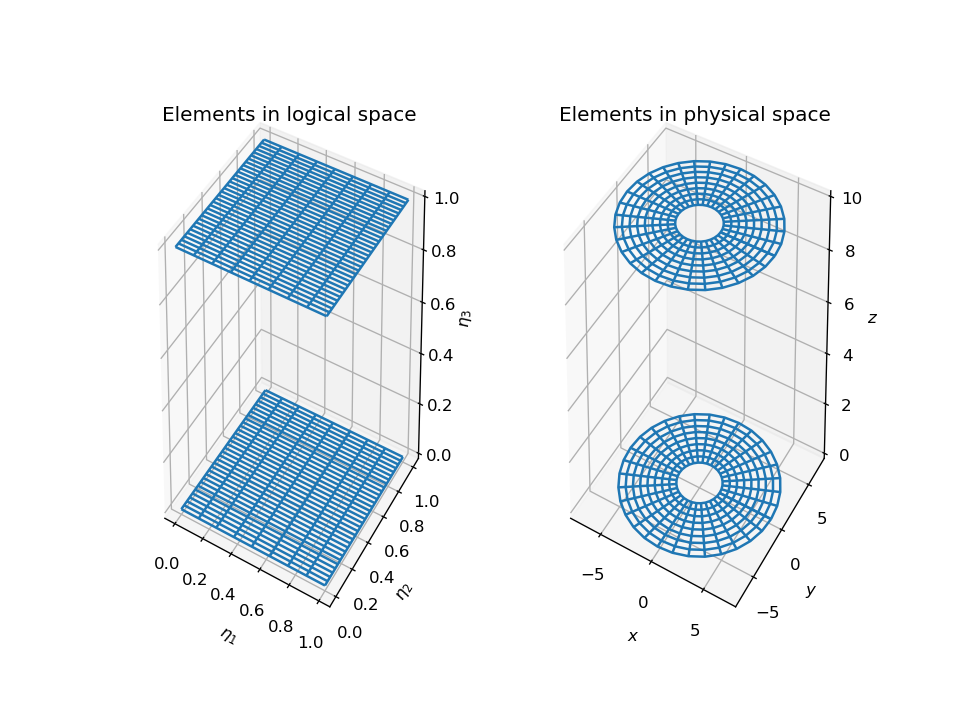

Text(0.5, 0, '$z$')

In [55]:
#-----------------
# Create the grid:
#-----------------
# side lengths of logical cube
L = [1., 1., 1.] 

# spline degrees
p = [3, 3, 1]   

# periodic boundary conditions (use 'False' if clamped)
bc = [False, True, True]

# number of elements
Nel = [16, 32, 8]   

# element boundaries
el_b = [np.linspace(0., L, Nel + 1) for L, Nel in zip(L, Nel)] 

# knot sequences
T = [bsp.make_knots(el_b, p, bc) for el_b, p, bc in zip(el_b, p, bc)] 

# Greville points
G = [bsp.greville(T, p, bc) for T, p, bc in zip(T, p, bc)]

#----------------------------
# p-forms in physical domain:
#----------------------------

# We suppose the physical domain to be a hollow cylinder with
R1 = 2.
R2 = 7.
Lz = 10.

args_map  = 2, [R1, R2, Lz]

# Grid points in physical domain and pulled-back form evaluated at grid points 
for i, q1 in enumerate( el_b[0] ):
    for j, q2 in enumerate( el_b[1] ):
        for k, q3 in enumerate( el_b[2] ):           
            x[i, j, k]     = mp.f( q1, q2, q3, *args_map, 1)
            y[i, j, k]     = mp.f( q1, q2, q3, *args_map, 2)
            z[i, j, k]     = mp.f( q1, q2, q3, *args_map, 3)
            fun_h[i, j, k] = fun( q1, q2, q3 )
            
%matplotlib notebook

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

qq1, qq2 = np.meshgrid( el_b[0], el_b[1], indexing='ij' )
qq3 = np.ones( qq1.shape )

ax.plot_wireframe( qq1, qq2, qq3*0., rstride=2 )
ax.plot_wireframe( qq1, qq2, qq3,    rstride=2 )
ax.set_title('Elements in logical space')
ax.set_xlabel('$\eta_1$')
ax.set_ylabel('$\eta_2$')
ax.set_zlabel('$\eta_3$')

ax2.plot_wireframe( x[:,:,0], y[:,:,0], z[:,:,0], rstride=2 )
ax2.plot_wireframe( x[:,:,-1], y[:,:,-1], z[:,:,-1], rstride=2 )
ax2.set_title('Elements in physical space')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$')

## Physical functions $\to$ discrete logical functions (pull-back) <a class="anchor" id="phystolog"></a>

## Discrete logical functions $\to$ plots in physical space (push-forward) <a class="anchor" id="logtophys"></a>

<IPython.core.display.Javascript object>


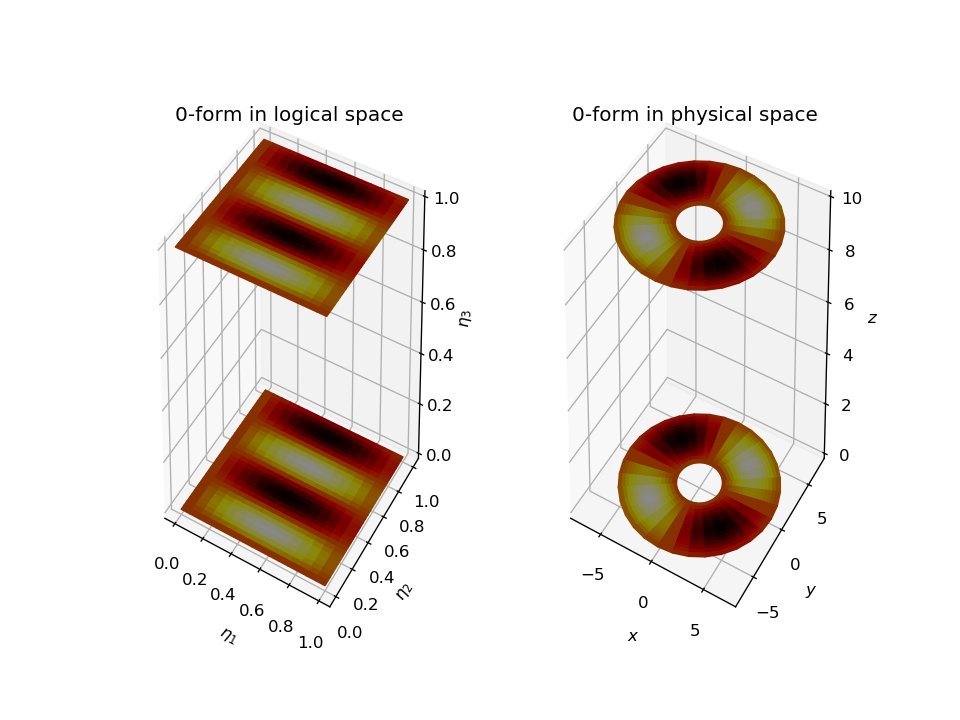

Text(0.5, 0, '$z$')

In [58]:
# Some continuous function in the logical domain:
fun  = lambda xi1, xi2, xi3 : np.sin( 4*np.pi*xi2 )*np.sin( np.pi*xi1 )

# Project to get a discrete version of fun:

# arrays for push-forward of p-forms
x        = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
y        = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
z        = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
fun_h_0  = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
fun_h_11 = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
fun_h_12 = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
fun_h_13 = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
fun_h_21 = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
fun_h_22 = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
fun_h_23 = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )
fun_h_3  = np.empty( (el_b[0].size, el_b[1].size, el_b[2].size) )

# Grid points in physical domain and push-forward of p-forms evaluated at grid points 
for i, q1 in enumerate( el_b[0] ):
    for j, q2 in enumerate( el_b[1] ):
        for k, q3 in enumerate( el_b[2] ):           
            x[i, j, k]     = mapping.f( q1, q2, q3, *args_map, 1)
            y[i, j, k]     = mapping.f( q1, q2, q3, *args_map, 2)
            z[i, j, k]     = mapping.f( q1, q2, q3, *args_map, 3)
            
            # --------------------------------
            # Different types of push-forward:
            # --------------------------------
            # fun is a 0-form
            fun_h_0[i, j, k]  = fun( q1, q2, q3 )  
            
            # fun is the first  component of a 1-form
            fun_h_11[i, j, k] = fun( q1, q2, q3 )  
            
            # fun is the second component of a 1-form
            fun_h_12[i, j, k] = fun( q1, q2, q3 )  
            
            # fun is the third  component of a 1-form
            fun_h_13[i, j, k] = fun( q1, q2, q3 )  
            
            # fun is the first  component of a 2-form
            fun_h_21[i, j, k] = fun( q1, q2, q3 ) 
            
            # fun is the second component of a 2-form
            fun_h_22[i, j, k] = fun( q1, q2, q3 )  
            
            # fun is the third  component of a 2-form
            fun_h_23[i, j, k] = fun( q1, q2, q3 )
            
            # fun is a 3-form
            fun_h_3[i, j, k]  = fun( q1, q2, q3 )  
            
%matplotlib notebook

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

obj_col = colmap.ScalarMappable(cmap=plt.cm.hot)
rgb_arr1 = obj_col.to_rgba( fun_h_0[:,:,0] )
rgb_arr2 = obj_col.to_rgba( fun_h_0[:,:,-1] )

ax.plot_surface( qq1, qq2, qq3*0., facecolors=rgb_arr1 )
ax.plot_surface( qq1, qq2, qq3,    facecolors=rgb_arr2 )
ax.set_title('0-form in logical space')
ax.set_xlabel('$\eta_1$')
ax.set_ylabel('$\eta_2$')
ax.set_zlabel('$\eta_3$')

ax2.plot_surface( x[:,:,0], y[:,:,0], z[:,:,0],    facecolors=rgb_arr1 )
ax2.plot_surface( x[:,:,-1], y[:,:,-1], z[:,:,-1], facecolors=rgb_arr2 )
ax2.set_title('0-form in physical space')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$')

#plt.colorbar(colmap.ScalarMappable(cmap=plt.cm.hot), ax=ax)

<IPython.core.display.Javascript object>


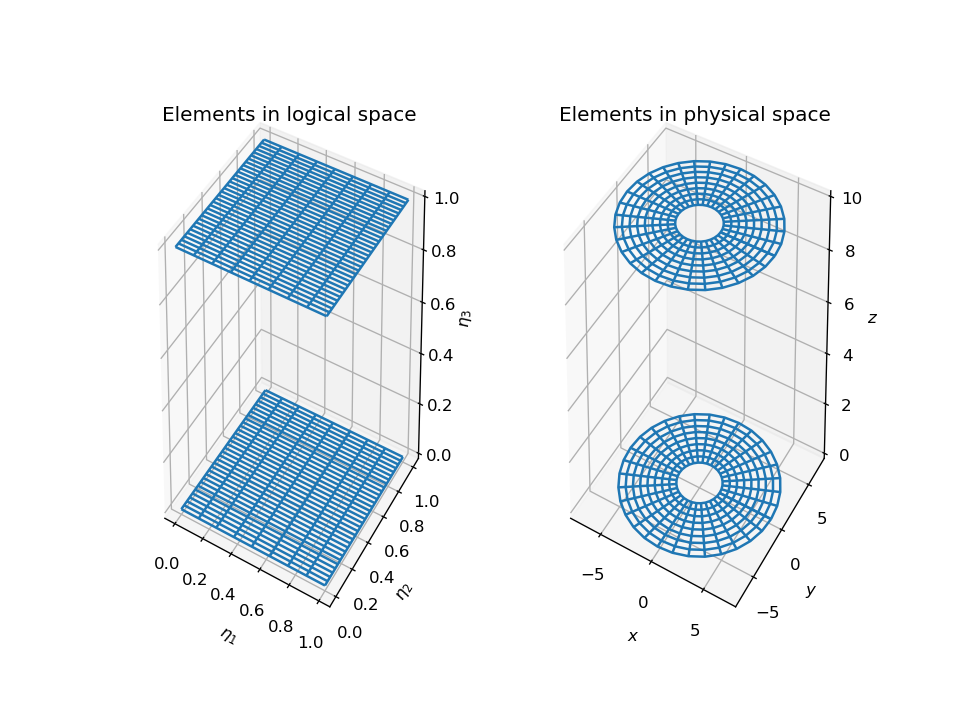

Text(0.5, 0, '$z$')

<IPython.core.display.Javascript object>


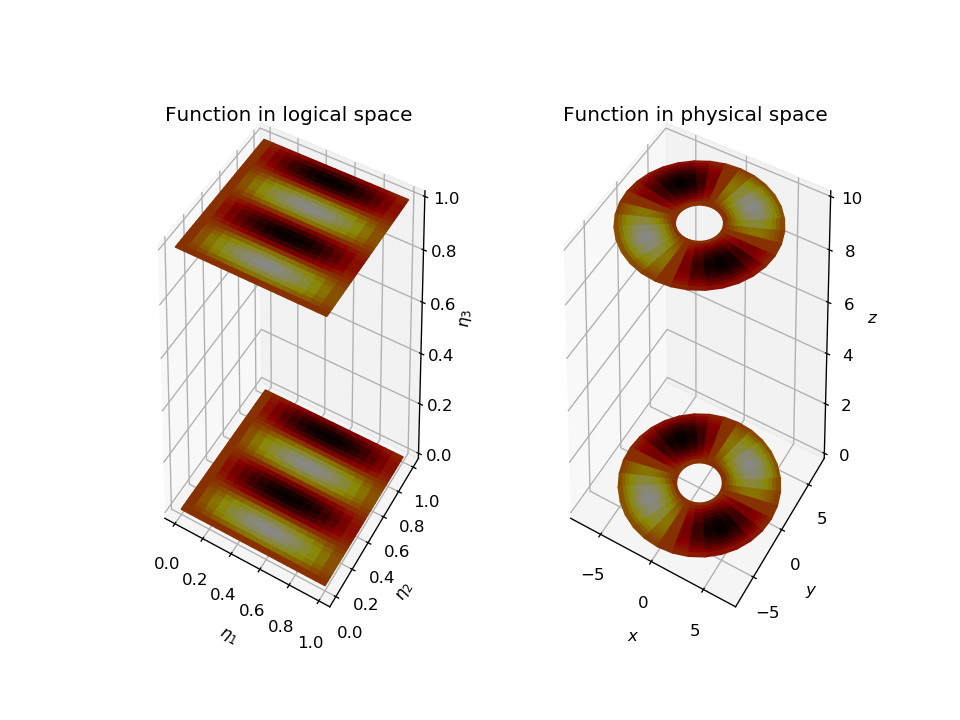

Text(0.5, 0, '$z$')

In [6]:
rgb_arr1.shape

(17, 33, 4)

In [7]:
qq1.shape

(33, 17)